## Collect Data

In [ ]:
import numpy as np
import pandas as pd
import scipy 
import scipy.stats
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
class DataSource:
    def __init__(self, path):
        self.path = path
        
    def load_data(self, size:int = 10):
        self.dataset = pd.read_csv(self.path)
        return self.dataset.head(size)
        

In [ ]:
class OrdinalFeature:
    def __init__(self):
        self.min = None
        self.max = None
        self.range = None
        self.mean = None
        self.median = None
        self.q1 = None
        self.q3 = None
        self.iq_range = None
        self.variance = None
        self.std = None
        self.skewness = None

        

In [ ]:
class DatasetProperties:
    def __init__(self):
        self.count = 0
        self.features = []
        self.target=""
        self.features_count=0
        self.ordinal_features = []
        self.categorical_features=[]
        self.dataframe_summary = None
        self.feature_properties = collections.defaultdict(OrdinalFeature)
        

In [ ]:
class DataAnalysis:
    def __init__(self, dataframe, target_column):
        
        self.dataframe = dataframe
        
        self.prop = DatasetProperties()
        
        # total number of rows in the dataset
        self.prop.count= self.dataframe.count()[0]
        
        # target variable name
        self.prop.target = target_column
        
        # total number of columns
        self.prop.features = list(filter(lambda x: target_column != x, self.dataframe.columns))
        
        # features count
        self.prop.features_count = len(self.prop.features)
        
        # ordinal features
        self.prop.ordinal_features = list(self.dataframe[self.prop.features].select_dtypes(include=['number']).columns)
        
        # categorical features   
        self.prop.categorical_features = list(self.dataframe[self.prop.features].select_dtypes(include=['object']).columns)
    
    
    def describe_data(self):        
        
        for feature in self.prop.features:
            
            print(f"\n#################################################### {feature} ################################################\n")
            
            # check whether the column is numeric or categorical column
            if(feature not in self.prop.categorical_features):
                           
                # check weather the column contain missing values
                values = self.dataframe[feature]
                missing_values = values.isnull().sum()
                print( f"There are {missing_values} missing values in column {feature}")
            
                # check whether the column contains non-numeric values
                invalid_data = self.dataframe[~self.dataframe.apply(lambda x: np.isreal(x[feature]),axis=1)][feature].count()
                print( f"There are {invalid_data} invalid data in column {feature}")               
                
                ordfeature = OrdinalFeature()                
                
                # get min, mean, median, Q1 , Q3, max and range
                ordfeature.min = np.min(values)
                ordfeature.max = np.max(values)
                ordfeature.range = np.ptp(values)
                
                ordfeature.mean = np.mean(values)
                ordfeature.median = np.median(values)
                
                ordfeature.q1 = np.percentile(values,25, axis=0, interpolation='lower')
                ordfeature.q3 = np.percentile(values,75, axis=0, interpolation='lower')
                ordfeature.iq_range = scipy.stats.iqr(values, axis=0 , rng=(25, 75), interpolation='lower')
                
                ordfeature.variance = np.var(values,axis=0)
                ordfeature.std= np.std(values,axis=0)
                ordfeature.skewness = scipy.stats.skew(values,axis=0)
                
                print("Min value in the distribution is: ", ordfeature.min)
                print("Max value in the distribution is: ", ordfeature.max)
                print("Range of distribution is: ", ordfeature.range)
                print("Mean of distribution is: ", ordfeature.mean)
                print("Median of distribution is: ", ordfeature.median)
                print("Q1 Value: ", ordfeature.q1)
                print("Q3 Value: ", ordfeature.q3)
                print("IQR: ", ordfeature.iq_range)
                print("Variance in the distribution is:", ordfeature.variance)
                print("Standard Deviation in the distribution is:", ordfeature.std)
                print("Skewness in the distribution is:", ordfeature.skewness)
                
                if ordfeature.skewness < 0:
                    print("As per skewness value, there are outliers in the left side of distribution")
                elif ordfeature.skewness > 0:
                    print("As per skewness value, there are outliers in the right side of distribution")
                else:
                    print("As per skewness value, there is no outliers in the distribution")
                    
                self.prop.feature_properties[feature] = ordfeature
                            
            else:
                print(f"Distribution of feature - {feature} for {self.prop.count} records are shown below:\n")
                obj = self.dataframe[feature].value_counts()
                for(key,value) in zip(obj.index,obj):
                    print(key,"-",value)
                
            print(f"\n######################################################## {feature} End ####################################################\n")
            
        print(f"########################## Analyzing target column - {self.prop.target} distribution ###############################################\n")
        
        print(f"Distribution of target - {self.prop.target} for {self.prop.count} records are shown below:\n")
        
        obj = self.dataframe[self.prop.target].value_counts()
        for(key,value) in zip(obj.index,obj):
            print(key,"-",value)
            
        print("\n######################################## Target column distribution End ############################################# \n")
        
        print(f"\n######################################################## Feature Description End ##########################################\n")
        
        return self.dataframe.describe()
    
    
    def data_info(self):
        
        self.prop.dataframe_summary =  self.dataframe.info()
        
        print("\n\n############################################## Dataset Info ############################################################## \n")
        
        print(f"There are {self.prop.count} records in the dataset")
        print(f"There are {self.prop.features_count} independent features in the dataset")
        print(f"Out of total {self.prop.features_count} features, {len(self.prop.categorical_features)} features are categorical")
        
        print("\n################################################# Dataset Info End ################################################## \n \n")        
        
    
    def explore_feature_relationships(self):
        # find the columns which are highly correlated
        
        print("################### Correlation Analysis ##########################")
        corr = self.dataframe[self.prop.ordinal_features].corr()
        print(corr.shape)
        
        # find columns which are non-linearily related        
        
        
        
        
        
    

In [ ]:
class DataVisualizations:
    def analyze_ordinal_feature_relationships(self, dataset: pd.DataFrame, metadata: DatasetProperties):
        # plot individual feature scatter plot with target feature class highlights 
        ordinal_features= dataset[metadata.ordinal_features]
        
        total_combinations = (len(ordinal_features.columns)-1)* (len(ordinal_features.columns))//2
        
        rows = total_combinations//3 if total_combinations % 3 == 0 else total_combinations//3 + 1
        
        cols = 3
        
        f,axis = plt.subplots(rows,cols,figsize=(15,rows*5))
        
        ax_row = 0
        ax_col = 0
        
        for i in range(0, len(ordinal_features.columns)-1):            
            for j in range(i+1, len(ordinal_features.columns)):
                
                sns.scatterplot(ordinal_features[ordinal_features.columns[i]],ordinal_features[ordinal_features.columns[j]], ax=axis[ax_row, ax_col],hue=dataset[metadata.target])
                ax_col += 1
                if ax_col == cols:
                    ax_col = 0
                    ax_row += 1
    
    def analyze_categorical_feature_relationships(self, dataset: pd.DataFrame, metadata: DatasetProperties):
        categorical_features = dataset[metadata.categorical_features]
        ordinal_features = dataset[metadata.ordinal_features]
        cat_length = len(categorical_features.columns)
        ord_length = len(ordinal_features.columns)
        total_combinations = cat_length*ord_length
        cols = 3
        rows = total_combinations // cols if total_combinations % cols ==0 else (total_combinations // cols) + 1
                
        f,axis = plt.subplots(rows,cols,figsize=(15,rows*5))
        
        ax_row = 0
        ax_col = 0
        
        for i in range(0, len(categorical_features.columns)):
            for j in range(0,len(ordinal_features.columns)):
                
                sns.stripplot(ordinal_features[ordinal_features.columns[j]],categorical_features[categorical_features.columns[i]], ax=axis[ax_row, ax_col],hue=dataset[metadata.target])
                ax_col += 1
                if ax_col == cols:
                    ax_col = 0
                    ax_row += 1
        

In [ ]:
dataSource = DataSource("bank-full.csv")
dataSource.load_data()

data_analysis = DataAnalysis(dataSource.dataset,"Target")
info = data_analysis.data_info()
data_analysis.describe_data()
data_analysis.explore_feature_relationships()




In [15]:
data_analysis.explore_feature_relationships()

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097772 -0.009055 -0.004649  0.004789 -0.023738  0.001301
balance   0.097772  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009055  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004649  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004789 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023738  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001301  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


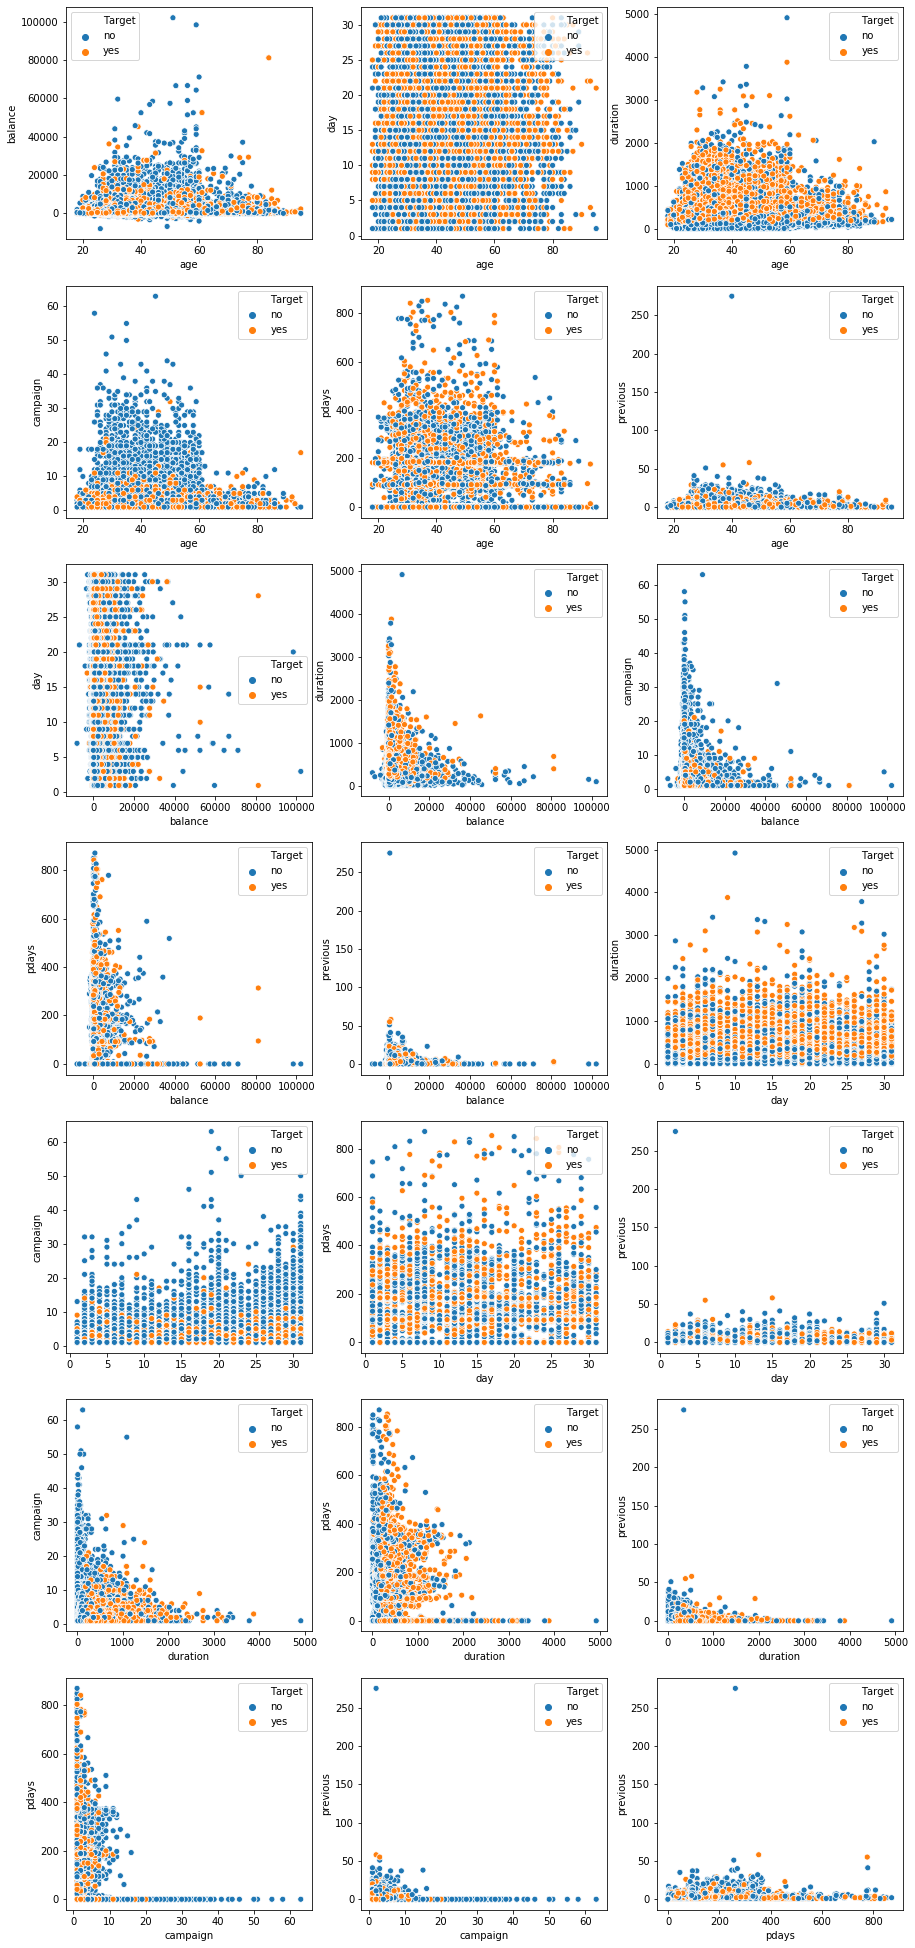

In [8]:
visualization = DataVisualizations()
visualization.analyze_ordinal_feature_relationships(dataSource.dataset, data_analysis.prop)

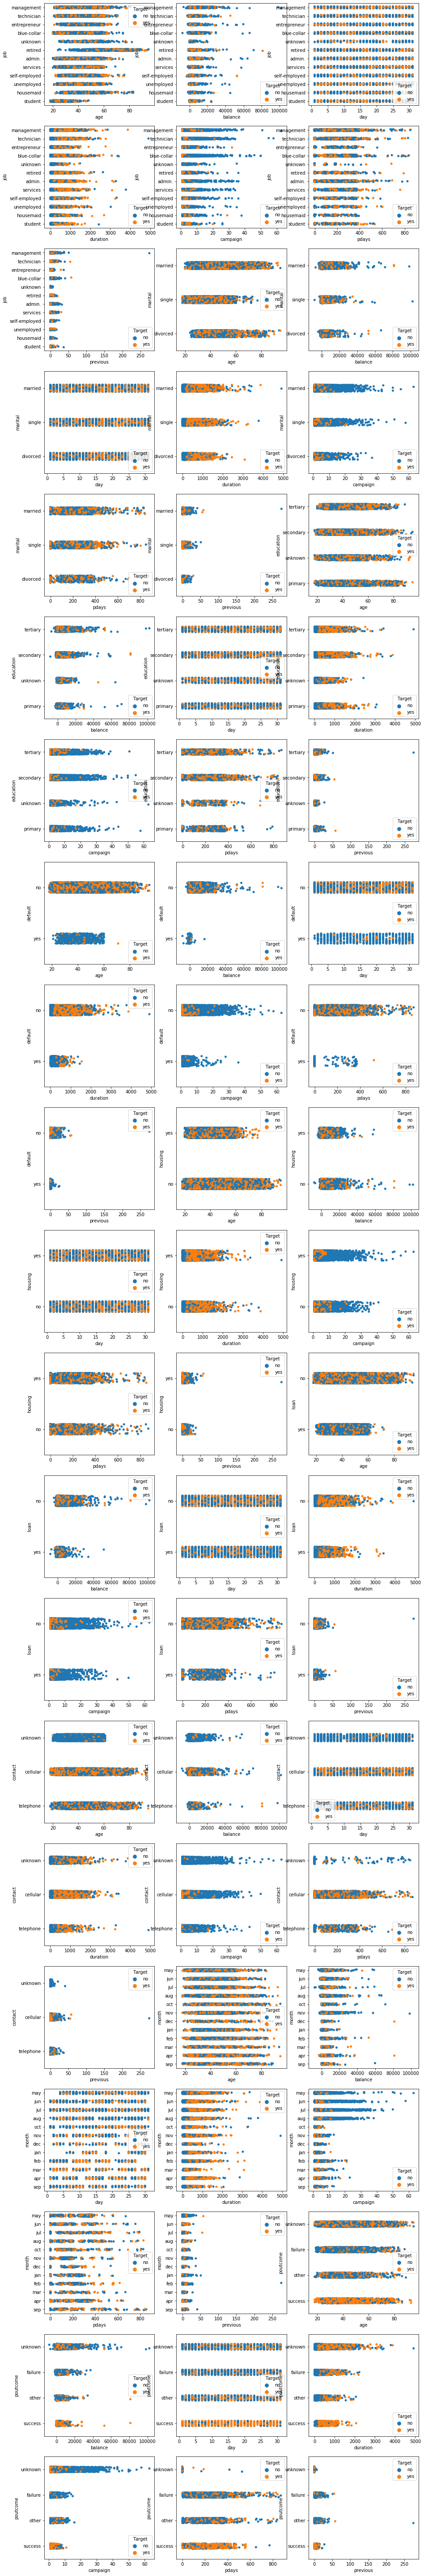

In [9]:
visualization.analyze_categorical_feature_relationships(dataSource.dataset, data_analysis.prop)